In [1]:
import sys, numpy
print("PY:", sys.executable)
print("NumPy:", numpy.__version__)

PY: c:\Users\Gurpreet Kaur\AndroidStudioProjects\advanced-project\venv\Scripts\python.exe
NumPy: 2.3.2


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("cardio_train.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Notice that age is in days format, so we are converting those in years format.

In [4]:
# Convert age from days to years and round to nearest integer
df['age_years'] = (df['age'] / 365).round()


In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


## Now Lets create a BMI index which might come in handy later.

In [7]:
# Calculate BMI and add as a new column
df['BMI'] = df['weight'] / ( (df['height'] / 100) ** 2 )
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177


## Lets add another column which will categorize the BMI index value. This way we can understand clearly where a person stands physical aspect wise.

In [8]:
bins = [0, 18.5, 25, 30, float('inf')]
labels = [1, 2, 3, 4] # 'Underweight':1, 'Normal': 2, 'Overweight': 3, 'Obese': 4

df['BMI_category_num'] = pd.cut(df['BMI'], bins=bins, labels=labels).astype(int)


In [9]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category_num
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120,2
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479,3
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177,2


## We need to convert the BMI category into numbers like 1, 2, 3 , 4 etc. This way it's easier for the model to train effectively because some ML model works better on numeric encoding.

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                70000 non-null  int64  
 1   age               70000 non-null  int64  
 2   gender            70000 non-null  int64  
 3   height            70000 non-null  int64  
 4   weight            70000 non-null  float64
 5   ap_hi             70000 non-null  int64  
 6   ap_lo             70000 non-null  int64  
 7   cholesterol       70000 non-null  int64  
 8   gluc              70000 non-null  int64  
 9   smoke             70000 non-null  int64  
 10  alco              70000 non-null  int64  
 11  active            70000 non-null  int64  
 12  cardio            70000 non-null  int64  
 13  age_years         70000 non-null  float64
 14  BMI               70000 non-null  float64
 15  BMI_category_num  70000 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 8

## Now Lets focus on cleaning the dataset, this is crucial for the future steps in our project.

### Starting off with seeing if there is any missing values or not.

In [11]:
df.isnull().sum()

id                  0
age                 0
gender              0
height              0
weight              0
ap_hi               0
ap_lo               0
cholesterol         0
gluc                0
smoke               0
alco                0
active              0
cardio              0
age_years           0
BMI                 0
BMI_category_num    0
dtype: int64

## Looks like there isn't any missing values, but we still need to look out for abnormal values or outliers which will harm our model's accuracy.

In [12]:
df_clean = df.copy() # Create a copy to preserve the original data
df_clean.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category_num
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120,2
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479,3
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177,2


### Lets look at age

Reference: World Health Organization (WHO). "Adolescent health." Defines adulthood starting from 18 years.

Rationale: We exclude <18 (children) and >100 (extreme outliers).

In [13]:


# --- AGE CLEANING ---
print("Min age:", df_clean['age_years'].min())
print("Max age:", df_clean['age_years'].max())

# Count abnormal ages
abnormal_age = df_clean[(df_clean['age_years'] < 18) | (df_clean['age_years'] > 100)]
print("Abnormal ages found:", abnormal_age.shape[0])

# Drop them
df_clean = df_clean[(df_clean['age_years'] >= 18) & (df_clean['age_years'] <= 100)]
print("Remaining rows after age cleaning:", df_clean.shape[0])


Min age: 30.0
Max age: 65.0
Abnormal ages found: 0
Remaining rows after age cleaning: 70000


## Lets look at the height now.

Reference: Centers for Disease Control and Prevention (CDC), Anthropometric Reference Data for U.S. Adults, 2015–2018.

Adult height typically ranges ~140–200 cm, but rare cases can extend beyond.

Rationale: We used 80–250 cm as a broad but realistic filter to exclude data entry errors.





In [14]:
# --- HEIGHT CLEANING (80–250 cm) ---
print("Min height:", df_clean['height'].min())
print("Max height:", df_clean['height'].max())

# Count abnormal heights
abnormal_height = df_clean[(df_clean['height'] < 80) | (df_clean['height'] > 250)]
print("Abnormal heights found:", abnormal_height.shape[0])

# Drop them
df_clean = df_clean[(df_clean['height'] >= 80) & (df_clean['height'] <= 250)]
print("Remaining rows after height cleaning:", df_clean.shape[0])


Min height: 55
Max height: 250
Abnormal heights found: 22
Remaining rows after height cleaning: 69978


## Lets look at weight now.

Reference: CDC Anthropometric Reference Data 2015–2018.

Adult weight distribution: ~45–120 kg for most adults, but can extend higher.

Rationale: We set 40–200 kg as plausible to allow for heavier individuals while filtering errors.

In [15]:

print("Min weight:", df_clean['weight'].min())
print("Max weight:", df_clean['weight'].max())

# Count abnormal weights
abnormal_weight = df_clean[(df_clean['weight'] < 40) | (df_clean['weight'] > 200)]
print("Abnormal weights found:", abnormal_weight.shape[0])

# Drop them
df_clean = df_clean[(df_clean['weight'] >= 40) & (df_clean['weight'] <= 200)]
print("Remaining rows after weight cleaning:", df_clean.shape[0])


Min weight: 10.0
Max weight: 200.0
Abnormal weights found: 52
Remaining rows after weight cleaning: 69926


## Lets look at blood pressure

Reference: American Heart Association (AHA) – 2017 Guidelines.

Physiological bounds: 60–240 systolic (ap_hi), 40–130 diastolic (ap_lo).

In [16]:
# Show rows where systolic blood pressure (ap_hi) is less than 0
low_ap_hi = df_clean[df_clean['ap_hi'] < 0]
low_ap_lo = df_clean[df_clean['ap_lo'] < 0]
print(f"Number of records with ap_hi < 0: {len(low_ap_hi) }")
display(low_ap_hi)
print(f"Number of records with ap_lo < 0: {len(low_ap_lo) }")
display(low_ap_lo)


Number of records with ap_hi < 0: 7


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category_num
4607,6525,15281,1,165,78.0,-100,80,2,1,0,0,1,0,42.0,28.650138,3
16021,22881,22108,2,161,90.0,-115,70,1,1,0,0,1,0,61.0,34.720883,4
20536,29313,15581,1,153,54.0,-100,70,1,1,0,0,1,0,43.0,23.068051,2
23988,34295,18301,1,162,74.0,-140,90,1,1,0,0,1,1,50.0,28.196921,3
25240,36025,14711,2,168,50.0,-120,80,2,1,0,0,0,1,40.0,17.715420,1
35040,50055,23325,2,168,59.0,-150,80,1,1,0,0,1,1,64.0,20.904195,2
46627,66571,23646,2,160,59.0,-120,80,1,1,0,0,0,0,65.0,23.046875,2


Number of records with ap_lo < 0: 1


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category_num
60106,85816,22571,1,167,74.0,15,-70,1,1,0,0,1,1,62.0,26.533759,3


In [17]:
df_clean['ap_hi'] = df_clean['ap_hi'].abs()
df_clean['ap_lo'] = df_clean['ap_lo'].abs()

In [18]:
# Show rows where diastolic blood pressure (ap_lo) is greater than 200
high_ap_lo = df_clean[df_clean['ap_lo'] > 200]
print(f"Number of records with ap_lo > 200: {len(high_ap_lo)}")
display(high_ap_lo)

Number of records with ap_lo > 200: 950


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category_num
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1,48.0,29.263340,3
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1,60.0,24.341758,2
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1,50.0,36.888889,4
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1,64.0,20.338326,2
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1,51.0,34.154158,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1,64.0,29.043709,3
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1,60.0,24.238227,2
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1,58.0,33.659297,4
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0,61.0,28.305995,3


In [19]:
# (SBP: 60-240, DBP: 40-130)
# Defining plausible limits
MIN_SYSTOLIC  = 60
MAX_SYSTOLIC  = 240
MIN_DIASTOLIC = 40
MAX_DIASTOLIC = 130


In [20]:
# CORRECT THE COMMON DATA ENTRY ERROR: Missing decimal in Diastolic
# We assume any diastolic value between 400 and 1300 with trailing '00' is meant to be divided by 10.
suspicious_dia_range_lower = (400, 1300)


dia_error_mask = (
    (df_clean['ap_lo'] >= suspicious_dia_range_lower[0]) &
    (df_clean['ap_lo'] <= suspicious_dia_range_lower[1]) &
    (df_clean['ap_lo'] % 100 == 0)
)

before_corr = df_clean['ap_lo'].copy()
df_clean.loc[dia_error_mask, 'ap_lo'] = df_clean.loc[dia_error_mask, 'ap_lo'] / 10
print(f"Corrected {dia_error_mask.sum()} diastolic values by dividing by 10.")


Corrected 848 diastolic values by dividing by 10.


In [21]:
# CORRECT THE COMMON DATA ENTRY ERROR: Missing decimal in Systolic
# We assume any systolic value between 600 and 2400 with trailing '00' is meant to be divided by 10.
suspicious_dia_range_higher = (600, 2400)

dia_error_mask = (
    (df_clean['ap_hi'] >= suspicious_dia_range_higher[0]) &
    (df_clean['ap_hi'] <= suspicious_dia_range_higher[1]) &
    (df_clean['ap_hi'] % 100 == 0)
)

before_corr = df_clean['ap_hi'].copy()
df_clean.loc[dia_error_mask, 'ap_hi'] = df_clean.loc[dia_error_mask, 'ap_hi'] / 10
print(f"Corrected {dia_error_mask.sum()} diastolic values by dividing by 10.")

Corrected 7 diastolic values by dividing by 10.


In [22]:
# Create a boolean mask for rows that are within limits
valid_data_mask = (
    (df_clean['ap_hi'] >= MIN_SYSTOLIC)  &
    (df_clean['ap_hi'] <= MAX_SYSTOLIC)  &
    (df_clean['ap_lo'] >= MIN_DIASTOLIC) &
    (df_clean['ap_lo'] <= MAX_DIASTOLIC)
)


In [23]:
# Apply the mask to get your cleaned dataset (overwrite df_clean as requested)
before_rows = df_clean.shape[0]
df_clean = df_clean[valid_data_mask].copy()
after_rows = df_clean.shape[0]

print(f"Rows kept after BP bounds: {after_rows} (dropped {before_rows - after_rows})")
display(df_clean.describe())


Rows kept after BP bounds: 69509 (dropped 417)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category_num
count,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000,69509.000000
mean,49976.992217,19468.831043,1.349595,164.396021,74.229096,126.974795,81.581594,1.367017,1.226187,0.088276,0.053619,0.803608,0.499202,53.338632,27.521972,2.877498
std,28855.782856,2467.390960,0.476845,8.013569,14.352133,16.991972,9.680232,0.680481,0.572075,0.283698,0.225266,0.397271,0.500003,6.765634,5.543647,0.807632
min,0.000000,10798.000000,1.000000,80.000000,40.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,13.520822,1.000000
25%,25000.000000,17663.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,2.000000
50%,50005.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.395803,3.000000
75%,74899.000000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.189591,4.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,278.125000,4.000000


## Lets look at BMI

Reference: World Health Organization (WHO) BMI classification.

Rationale: Plausible BMI for adults is generally 10–60. Values outside are considered unrealistic or erroneous.

In [24]:
print("Min BMI:", df_clean['BMI'].min())
print("Max BMI:", df_clean['BMI'].max())

# Count abnormal BMI
abnormal_bmi = df_clean[(df_clean['BMI'] < 10) | (df_clean['BMI'] > 60)]
print("Abnormal BMI values found:", abnormal_bmi.shape[0])


Min BMI: 13.520822065981614
Max BMI: 278.12499999999994
Abnormal BMI values found: 44


In [25]:
# Count rows before cleaning
before_rows = df_clean.shape[0]

# Drop abnormal BMI rows (<10 or >60)
df_clean = df_clean[(df_clean['BMI'] >= 10) & (df_clean['BMI'] <= 60)].copy()

# Count rows after cleaning
after_rows = df_clean.shape[0]

print(f"Rows kept after BMI cleaning: {after_rows} (dropped {before_rows - after_rows})")


Rows kept after BMI cleaning: 69465 (dropped 44)


## we have done the most part of the cleaning, we just need to see if there's any duplicate values or not.

In [26]:
# Count duplicate rows in the cleaned dataframe
duplicate_rows = df_clean.duplicated().sum()
print("Duplicate rows found:", duplicate_rows)


Duplicate rows found: 0


In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69465 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                69465 non-null  int64  
 1   age               69465 non-null  int64  
 2   gender            69465 non-null  int64  
 3   height            69465 non-null  int64  
 4   weight            69465 non-null  float64
 5   ap_hi             69465 non-null  int64  
 6   ap_lo             69465 non-null  int64  
 7   cholesterol       69465 non-null  int64  
 8   gluc              69465 non-null  int64  
 9   smoke             69465 non-null  int64  
 10  alco              69465 non-null  int64  
 11  active            69465 non-null  int64  
 12  cardio            69465 non-null  int64  
 13  age_years         69465 non-null  float64
 14  BMI               69465 non-null  float64
 15  BMI_category_num  69465 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 9.0 MB

## Lets scale our data for the better readabilty and also our model need it so that it can train effectively

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Drop BMI_category and age (in days)
df_to_scale = df_clean.drop(columns=['id', 'age', 'weight', 'BMI_category_num','cardio'])

# Scale all remaining features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_to_scale)

# Put back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_to_scale.columns, index=df_to_scale.index)

print("Scaled dataframe shape:", df_scaled.shape)
display(df_scaled)


Scaled dataframe shape: (69465, 11)


,gender,height,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,BMI
0,1.0,0.453333,0.277778,0.444444,0.0,0.0,0.0,0.0,1.0,0.571429,0.181722
1,0.0,0.373333,0.444444,0.555556,1.0,0.0,0.0,0.0,1.0,0.714286,0.460569
2,0.0,0.433333,0.388889,0.333333,1.0,0.0,0.0,0.0,0.0,0.628571,0.214870
3,1.0,0.460000,0.500000,0.666667,0.0,0.0,0.0,0.0,1.0,0.514286,0.326806
4,0.0,0.373333,0.222222,0.222222,0.0,0.0,0.0,0.0,0.0,0.514286,0.204185
...,...,...,...,...,...,...,...,...,...,...,...
69995,1.0,0.453333,0.333333,0.444444,0.0,0.0,1.0,0.0,1.0,0.657143,0.288443
69996,0.0,0.386667,0.444444,0.555556,0.5,0.5,0.0,0.0,1.0,0.914286,0.795020
69997,1.0,0.553333,0.666667,0.555556,1.0,0.0,0.0,1.0,0.0,0.628571,0.383672
69998,0.0,0.420000,0.416667,0.444444,0.0,0.5,0.0,0.0,0.0,0.885714,0.292140


In [29]:
to_file = df_scaled.join(df_clean[['cardio']])
to_file.to_csv('cleaned_scaled_data.csv', index=False)

In [30]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [31]:
# DATA PREPARATION

print("1. CHECKING DATA TYPES")
print("-" * 30)

# Display current data types
print("DataFrame Info:")
print(df_scaled.info())

# Identify numerical columns only
numerical_columns = df_scaled.select_dtypes(include=['number']).columns
print(f"\n Numerical columns selected: {len(numerical_columns)}")
print(f"Features: {list(numerical_columns)}")

# Create numerical-only dataframe
numerical_df = df_scaled[numerical_columns]
print(f"Working dataset: {numerical_df.shape[0]} rows, {numerical_df.shape[1]} columns")

1. CHECKING DATA TYPES
------------------------------
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 69465 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       69465 non-null  float64
 1   height       69465 non-null  float64
 2   ap_hi        69465 non-null  float64
 3   ap_lo        69465 non-null  float64
 4   cholesterol  69465 non-null  float64
 5   gluc         69465 non-null  float64
 6   smoke        69465 non-null  float64
 7   alco         69465 non-null  float64
 8   active       69465 non-null  float64
 9   age_years    69465 non-null  float64
 10  BMI          69465 non-null  float64
dtypes: float64(11)
memory usage: 6.4 MB
None

 Numerical columns selected: 11
Features: ['gender', 'height', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'BMI']
Working dataset: 69465 rows, 11 columns


In [32]:
# CORRELATION CALCULATION

print("\n2. CALCULATING CORRELATION MATRIX")
print("-" * 30)

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()
print(f"Correlation matrix shape: {correlation_matrix.shape}")

# Display correlation matrix values
print("\nCorrelation Matrix Values:")
print(correlation_matrix.round(3))


2. CALCULATING CORRELATION MATRIX
------------------------------
Correlation matrix shape: (11, 11)

Correlation Matrix Values:
             gender  height  ap_hi  ap_lo  cholesterol   gluc  smoke   alco  \
gender        1.000   0.515  0.062  0.068       -0.036 -0.021  0.338  0.171   
height        0.515   1.000  0.017  0.035       -0.054 -0.020  0.194  0.098   
ap_hi         0.062   0.017  1.000  0.723        0.196  0.092  0.027  0.033   
ap_lo         0.068   0.035  0.723  1.000        0.162  0.073  0.026  0.038   
cholesterol  -0.036  -0.054  0.196  0.162        1.000  0.451  0.011  0.035   
gluc         -0.021  -0.020  0.092  0.073        0.451  1.000 -0.005  0.010   
smoke         0.338   0.194  0.027  0.026        0.011 -0.005  1.000  0.340   
alco          0.171   0.098  0.033  0.038        0.035  0.010  0.340  1.000   
active        0.006  -0.008  0.000  0.000        0.010 -0.007  0.025  0.025   
age_years    -0.023  -0.085  0.208  0.154        0.154  0.098 -0.048 -0.030   
BM


3. CREATING CORRELATION HEATMAP
------------------------------


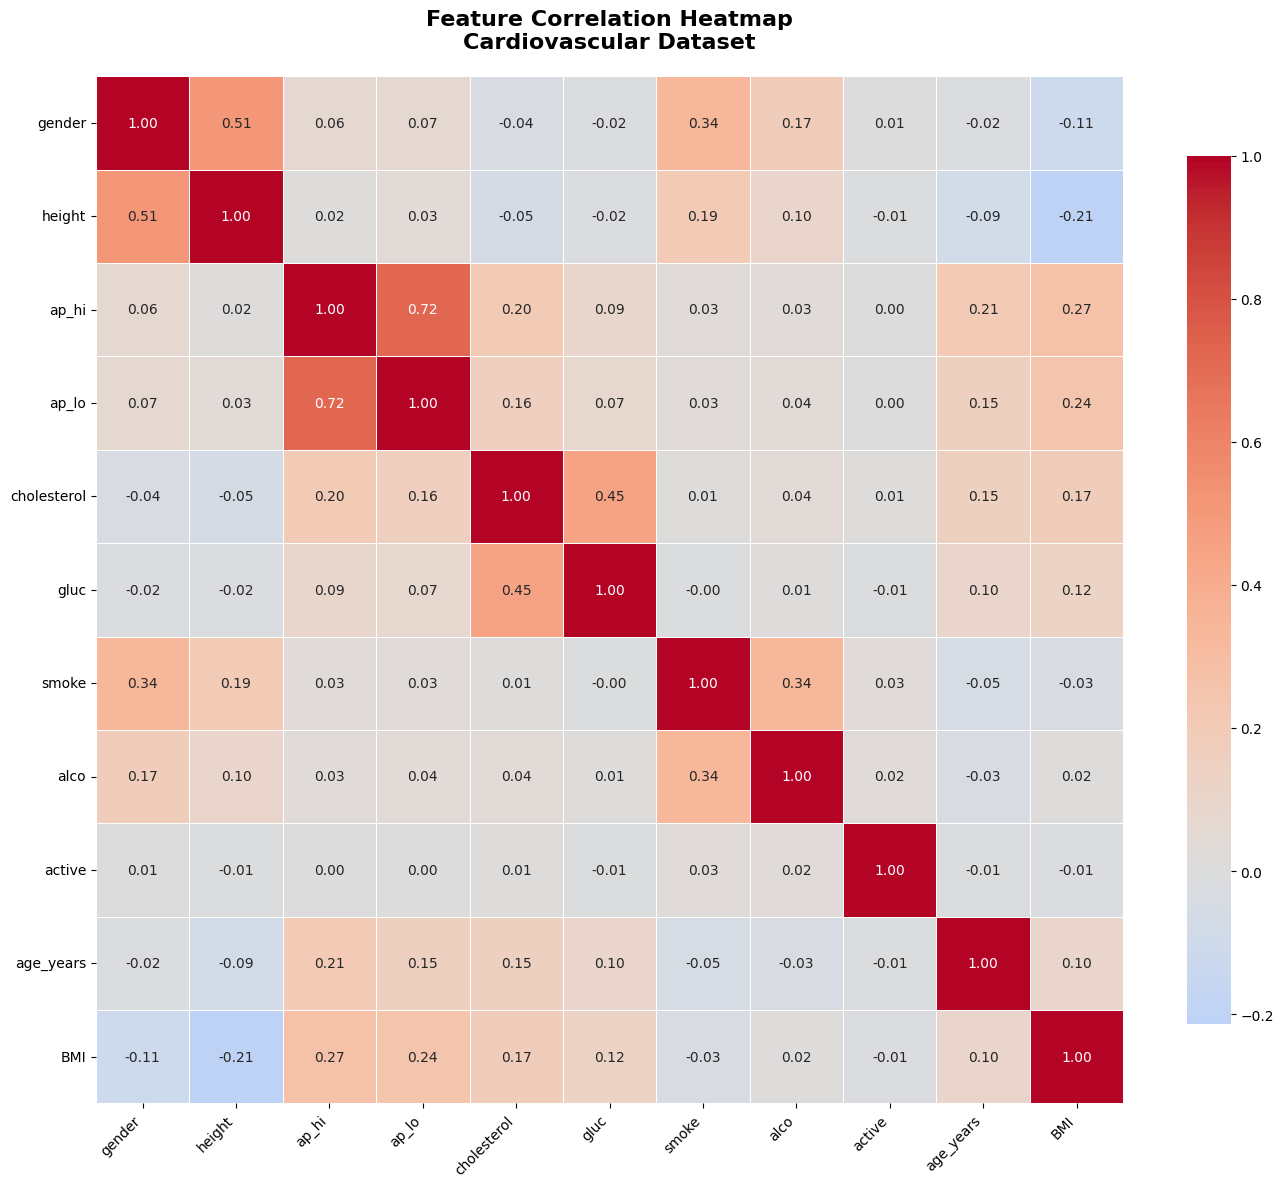

In [33]:
# HEATMAP VISUALIZATION

print("\n3. CREATING CORRELATION HEATMAP")
print("-" * 30)

# Set up the figure
plt.figure(figsize=(14, 12))

# Create the heatmap
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,           # Show correlation values
    cmap='coolwarm',      # Color scheme (blue-white-red)
    center=0,             # Center colormap at 0
    fmt='.2f',            # Format numbers to 2 decimal places
    linewidths=0.5,       # Add lines between cells
    square=True,          # Make cells square
    cbar_kws={"shrink": 0.8}  # Size of color bar
)

# Customize titles and labels
plt.title('Feature Correlation Heatmap\nCardiovascular Dataset',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)               # Keep y-axis labels horizontal

plt.tight_layout()
plt.show()

In [34]:
# CORRELATION ANALYSIS

print("\n4. CORRELATION ANALYSIS & INSIGHTS")
print("-" * 30)

# Get all correlation pairs (excluding self-correlation)
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1.0]  # Remove correlation with itself

# Sort by absolute value to find strongest correlations
corr_pairs_abs = corr_pairs.abs().sort_values(ascending=False)

print("STRONGEST CORRELATIONS:")

# Display top 10 strongest correlations (positive and negative)
print("\nTop 10 Strongest Correlations (Absolute Value):")
for i, (pair, corr_value) in enumerate(corr_pairs_abs.head(10).items()):
    actual_value = corr_pairs[pair]
    strength = "STRONG" if abs(actual_value) > 0.5 else "MODERATE" if abs(actual_value) > 0.3 else "WEAK"
    direction = "↑ POSITIVE" if actual_value > 0 else "↓ NEGATIVE"
    print(f"  {i+1:2d}. {pair[0]:15} ↔ {pair[1]:15} : {actual_value:6.3f} ({direction} - {strength})")


4. CORRELATION ANALYSIS & INSIGHTS
------------------------------
STRONGEST CORRELATIONS:

Top 10 Strongest Correlations (Absolute Value):
   1. ap_lo           ↔ ap_hi           :  0.723 (↑ POSITIVE - STRONG)
   2. ap_hi           ↔ ap_lo           :  0.723 (↑ POSITIVE - STRONG)
   3. gender          ↔ height          :  0.515 (↑ POSITIVE - STRONG)
   4. height          ↔ gender          :  0.515 (↑ POSITIVE - STRONG)
   5. cholesterol     ↔ gluc            :  0.451 (↑ POSITIVE - MODERATE)
   6. gluc            ↔ cholesterol     :  0.451 (↑ POSITIVE - MODERATE)
   7. smoke           ↔ alco            :  0.340 (↑ POSITIVE - MODERATE)
   8. alco            ↔ smoke           :  0.340 (↑ POSITIVE - MODERATE)
   9. smoke           ↔ gender          :  0.338 (↑ POSITIVE - MODERATE)
  10. gender          ↔ smoke           :  0.338 (↑ POSITIVE - MODERATE)


In [35]:
# TARGET VARIABLE ANALYSIS

print("\n5. TARGET VARIABLE CORRELATION (cardio)")
print("-" * 30)

if 'cardio' in correlation_matrix.columns:
    # Get correlations with target variable
    target_correlations = correlation_matrix['cardio'].sort_values(ascending=False)

    print("Features Most Correlated with Cardiovascular Disease:")
    print("-" * 50)

    for feature, corr_value in target_correlations.items():
        if feature != 'cardio':  # Exclude self-correlation
            if abs(corr_value) > 0.1:
                importance = "HIGH" if abs(corr_value) > 0.2 else "MEDIUM" if abs(corr_value) > 0.1 else "LOW"
                direction = "increases risk" if corr_value > 0 else "decreases risk"
                print(f"  • {feature:20} : {corr_value:6.3f} ({importance} - {direction})")
            else:
                print(f"  • {feature:20} : {corr_value:6.3f} (LOW impact)")


5. TARGET VARIABLE CORRELATION (cardio)
------------------------------
